## Predicting Accident Severity

### Background of the problem
The mission of **Seattle Department of Transportation (SDOT)** is to "*deliver a transportation system that provides safe and affordable access to places and opportunities*"<sup>[1]</sup>. One of the many ways to ensure that the mission is being fulfilled is by effectively handling of accidents. The Traffic Management Division of SDOT tracks as many accident details as possible for future references, and potential records for legal purposes. 

Accidents, of course, are unpredictable. But what if we can try to *somehow* predict the severity of an accident by knowing which factors that could potentially cause it? Having that wisdom can make the drivers, pedestrians, policy owners, transport groups, and SDOT itself to do their part in avoiding such tremendous event, or at least, keep it light. Perhaps, there could be new policies that can be implemented, an enhancement of security systems, traffic infrastructures, etc. Or, to the drivers, perhaps, avoid "accident-prone" lanes or roads, or as simple as driving more responsibly. And, for the pedestrians, they could be more aware of the surroundings. 
 
There are many benefits that everyone can get from these *usual*<sup>[2]</sup> scenarios that come before accidents. My goal in this project is to use the existing dataset from SDOT Traffic Management Division, Traffic Records Group, clean it, develop and train a model, and test its accuracy to predict the severity of an accident given some physical conditions that we have.
<br><br>
<sup>
[1]Source: <a href="https://www.seattle.gov/transportation/about-us">https://www.seattle.gov/transportation/about-us</a>
<br>
[2]Notice the terms I used, like "<i>somehow</i>" and "<i>usual</i>". These imply that this study can't guarantee a 100% accuracy of its findings. The likelihood of the success of this project depends on the data available and the model that will be used.
</sup>

### About the data
Our source data is the dataset from SDOT Traffic Management Division, Traffic Records Group which covers accidents in Seattle from 2004 to 2020. It contains 194673 accident records with 27 columns or attributes. The data is available and can be downloaded [here](https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv), while the data dictionary is found on this [link](https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf).

To better understand what the data has, I'll load it in and try to dissect it. Let's use `pandas`.

In [1]:
#import library
import pandas as pd

#remove limits to column
pd.set_option('max_columns', None)

#load the data
df = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')

#get first five rows
df.head()

C:\Users\COLLABERA TECH\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


#### Understanding the outcome
The first column, `SEVERITYCODE`, is what we're trying to predict. Let's see how many unique values it has.

In [2]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

As we can see from above results, we're only trying to predict two outcomes. Per the data dictionary, `1` means that there was just a prop damage, while `2` states that there were also injuries. We can use a binary classification model to predict whether an accident will just get either a prop damage, or there could be some injuries involved. One example of that is **Logistic Regression** which is the method that I'll use<sup>[3]</sup>.

In addition, the dataset is not balanced. To avoid any bias, our model should use a balanced dataset, which means that the final data we'll be working on should have the same number of `1` and `2`. I'll get back to this later.

Next, let's talk about other attributes. I'll use the `.info()` method to get the data type and the number of rows per column.
<br><br>
<sup>
[3] I might also use other models to somehow look at what model which will result to a higher accuracy rate.
</sup>

#### Identifying the predictors

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

By understanding what each column means<sup>[4]</sup>, we could identify which ones can be removed. I've decided to remove the following columns<sup>[5]</sup>.

COLUMN          |Reason
----------------|-----------
OBJECTID        |Unique identifier
INCKEY          |Unique identifier
COLDETKEY       |Unique identifier
REPORTNO        |Unique identifier
STATUS          |Not necessary for the model
ADDRTYPE        |Not necessary for the model
INTKEY          |Unique identifier
LOCATION        |Not necessary for the model
EXCEPTRSNCODE   |Not necessary for the model
EXCEPTRSNDESC   |Not necessary for the model
SEVERITYCODE.1  |Duplicate of `SEVERITYCODE`
SEVERITYDESC    |Text description `SEVERITYCODE`
INCDATE         |Date of the accident
INCDTTM         |Date and time of the accident
SDOT_COLCODE    |Unique identifier
SDOT_COLDESC    |Unique identifier
SDOTCOLNUM      |Unique identifier
INATTENTIONIND  |Data's too few
PEDROWNOTGRNT   |Data's too few
SPEEDING        |Data's too few
ST_COLDESC      |Text description of `ST_COLCODE`
CROSSWALKKEY    |Unique identifier
SEGLANEKEY      |Unique identifier

<br><br>
<sup>
[4] The data dictionary in this link has brief descriptions about what each column is for.
<br>
[5] I might bring them back later. For now, my focus on the road and weather condition before these accidents.
</sup>

In [4]:
col_to_drop = ['OBJECTID','INCKEY','COLDETKEY','REPORTNO','STATUS','ADDRTYPE','INTKEY','LOCATION','EXCEPTRSNCODE','EXCEPTRSNDESC','SEVERITYCODE.1','SEVERITYDESC','SDOT_COLCODE','SDOT_COLDESC','SDOTCOLNUM','INATTENTIONIND','PEDROWNOTGRNT','SPEEDING', 'INCDATE', 'INCDTTM', 'ST_COLDESC', 'CROSSWALKKEY','SEGLANEKEY']
df = df.drop(col_to_drop, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   SEVERITYCODE   194673 non-null  int64  
 1   X              189339 non-null  float64
 2   Y              189339 non-null  float64
 3   COLLISIONTYPE  189769 non-null  object 
 4   PERSONCOUNT    194673 non-null  int64  
 5   PEDCOUNT       194673 non-null  int64  
 6   PEDCYLCOUNT    194673 non-null  int64  
 7   VEHCOUNT       194673 non-null  int64  
 8   JUNCTIONTYPE   188344 non-null  object 
 9   UNDERINFL      189789 non-null  object 
 10  WEATHER        189592 non-null  object 
 11  ROADCOND       189661 non-null  object 
 12  LIGHTCOND      189503 non-null  object 
 13  ST_COLCODE     194655 non-null  object 
 14  HITPARKEDCAR   194673 non-null  object 
dtypes: float64(2), int64(5), object(8)
memory usage: 22.3+ MB


#### Handling missing values
Let's check the  the number of null values in each column.

In [5]:
def get_na(df):
    for col in df.columns:
        print('{:.2%} of the total values in column {} are null.'.format(df[col].isna().sum() / len(df), col))

get_na(df)

0.00% of the total values in column SEVERITYCODE are null.
2.74% of the total values in column X are null.
2.74% of the total values in column Y are null.
2.52% of the total values in column COLLISIONTYPE are null.
0.00% of the total values in column PERSONCOUNT are null.
0.00% of the total values in column PEDCOUNT are null.
0.00% of the total values in column PEDCYLCOUNT are null.
0.00% of the total values in column VEHCOUNT are null.
3.25% of the total values in column JUNCTIONTYPE are null.
2.51% of the total values in column UNDERINFL are null.
2.61% of the total values in column WEATHER are null.
2.57% of the total values in column ROADCOND are null.
2.66% of the total values in column LIGHTCOND are null.
0.01% of the total values in column ST_COLCODE are null.
0.00% of the total values in column HITPARKEDCAR are null.


Having the above figures, I can simply drop these null values. But before that, there are some columns with `Other` and `Unknown` entries. These will not add any value in this study as we're not sure what their true value is. Hence, I'm just replacing them with null values using `numpy`'s `.nan` function.

In [6]:
import numpy as np
df.replace('Other', np.nan, inplace=True)
df.replace('Unknown', np.nan, inplace=True)
get_na(df)

0.00% of the total values in column SEVERITYCODE are null.
2.74% of the total values in column X are null.
2.74% of the total values in column Y are null.
14.69% of the total values in column COLLISIONTYPE are null.
0.00% of the total values in column PERSONCOUNT are null.
0.00% of the total values in column PEDCOUNT are null.
0.00% of the total values in column PEDCYLCOUNT are null.
0.00% of the total values in column VEHCOUNT are null.
3.26% of the total values in column JUNCTIONTYPE are null.
2.51% of the total values in column UNDERINFL are null.
10.79% of the total values in column WEATHER are null.
10.39% of the total values in column ROADCOND are null.
9.70% of the total values in column LIGHTCOND are null.
0.01% of the total values in column ST_COLCODE are null.
0.00% of the total values in column HITPARKEDCAR are null.


The general rule that I follow is that, it the column's null or missing values is less than 20%, I can just drop them off<sup>[6]</sup>. So, we can now drop these null values. `.dropna()` method of a `pandas` dataframe can easily do that.
<br><br>
<sup>
[6] This is case-to-case basis. I found it simple dropping them off but it would be best if there's no wasted data. Maybe that's the improvement that I can make from this study.
</sup>

In [7]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143747 entries, 0 to 194672
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   SEVERITYCODE   143747 non-null  int64  
 1   X              143747 non-null  float64
 2   Y              143747 non-null  float64
 3   COLLISIONTYPE  143747 non-null  object 
 4   PERSONCOUNT    143747 non-null  int64  
 5   PEDCOUNT       143747 non-null  int64  
 6   PEDCYLCOUNT    143747 non-null  int64  
 7   VEHCOUNT       143747 non-null  int64  
 8   JUNCTIONTYPE   143747 non-null  object 
 9   UNDERINFL      143747 non-null  object 
 10  WEATHER        143747 non-null  object 
 11  ROADCOND       143747 non-null  object 
 12  LIGHTCOND      143747 non-null  object 
 13  ST_COLCODE     143747 non-null  object 
 14  HITPARKEDCAR   143747 non-null  object 
dtypes: float64(2), int64(5), object(8)
memory usage: 17.5+ MB


#### Balancing the data
We'll start balancing the data. First, I'll split the data into two -- one for `SEVERITYCODE` with all the `1` and one for `SEVERITYCODE` with all of `2`. Then, I'll combine them as one dataframe.

In [8]:
df2 = df.loc[df['SEVERITYCODE'] == 2]
df1 = df.loc[df['SEVERITYCODE'] == 1].sample(n=len(df2), random_state=1)
df_balanced = pd.concat([df1, df2]).reset_index(drop=True)
print(df_balanced['SEVERITYCODE'].value_counts())
print('The data is now balanced.')

2    48926
1    48926
Name: SEVERITYCODE, dtype: int64
The data is now balanced.


#### Converting categorical values to numerical
The last stage that our data needs to go through is to convert the categorical parameters into a numerical ones. I'll display first the number of unique values per column.

In [10]:
def get_unique_obj(df, cols):
    for col in df[cols].columns:
        print('{}: {}'.format(col, df[col].unique().tolist()))
        print('')
        
cols = ['COLLISIONTYPE', 'JUNCTIONTYPE', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'ST_COLCODE', 'HITPARKEDCAR']
get_unique_obj(df_balanced, cols)

COLLISIONTYPE: ['Sideswipe', 'Parked Car', 'Rear Ended', 'Head On', 'Angles', 'Right Turn', 'Left Turn', 'Pedestrian', 'Cycles']

JUNCTIONTYPE: ['Mid-Block (not related to intersection)', 'At Intersection (intersection related)', 'Mid-Block (but intersection related)', 'Driveway Junction', 'At Intersection (but not related to intersection)', 'Ramp Junction']

UNDERINFL: ['N', '0', 'Y', '1']

WEATHER: ['Overcast', 'Clear', 'Raining', 'Snowing', 'Fog/Smog/Smoke', 'Sleet/Hail/Freezing Rain', 'Severe Crosswind', 'Blowing Sand/Dirt', 'Partly Cloudy']

ROADCOND: ['Dry', 'Wet', 'Snow/Slush', 'Standing Water', 'Ice', 'Sand/Mud/Dirt', 'Oil']

LIGHTCOND: ['Daylight', 'Dark - Street Lights On', 'Dusk', 'Dark - Street Lights Off', 'Dawn', 'Dark - No Street Lights', 'Dark - Unknown Lighting']

ST_COLCODE: ['12', 12, '32', '14', 32, '24', '10', 13, 10, '16', 11, '26', 14, '13', 16, 15, 19, '11', '81', 20, '20', '28', 28, '15', '71', 2, '45', 73, '84', '29', 71, '2', '30', 0, 81, 26, 45, 29, 24, 72, 

Notice the `UNDERINFL` column which has four values (`0`, `N`, `1`, `Y`). `N` and `Y`, presumably and respectively, are `0` and `1`. This is under the assumption that this follows the basic boolean values of `True` (`Y` or 'yes') and `False` (`N` or 'no'), which are 1 and 0 respectively. So, I'll replace these text values into numerical and convert the entire column into integer type. 

I'll also convert the `N` and `Y` values in `HITPARKEDCAR` column and I'll convert `ST_COLCODE` since the numbers were read as object.

In [11]:
df_balanced['UNDERINFL'].replace('N', 0, inplace=True)
df_balanced['UNDERINFL'].replace('Y', 1, inplace=True)
df_balanced['HITPARKEDCAR'].replace('N', 0, inplace=True)
df_balanced['HITPARKEDCAR'].replace('Y', 1, inplace=True)
df_balanced['UNDERINFL'] = df_balanced['UNDERINFL'].astype(int)
df_balanced['ST_COLCODE'] = df_balanced['ST_COLCODE'].astype(int)
df_balanced['HITPARKEDCAR'] = df_balanced['HITPARKEDCAR'].astype(int)
print(df_balanced[['UNDERINFL', 'ST_COLCODE', 'HITPARKEDCAR']].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97852 entries, 0 to 97851
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   UNDERINFL     97852 non-null  int32
 1   ST_COLCODE    97852 non-null  int32
 2   HITPARKEDCAR  97852 non-null  int32
dtypes: int32(3)
memory usage: 1.1 MB
None


As for the rest, since they have several unique values, I'll use `pandas`' `get_dummies()` method to easily convert these columns into numerical values. Note that this method creates additional columns, so, we should expect that the columns we have in the data will increase.

In [12]:
final_data = pd.get_dummies(data=df_balanced, columns=['COLLISIONTYPE', 'JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND'])
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97852 entries, 0 to 97851
Data columns (total 48 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   SEVERITYCODE                                                    97852 non-null  int64  
 1   X                                                               97852 non-null  float64
 2   Y                                                               97852 non-null  float64
 3   PERSONCOUNT                                                     97852 non-null  int64  
 4   PEDCOUNT                                                        97852 non-null  int64  
 5   PEDCYLCOUNT                                                     97852 non-null  int64  
 6   VEHCOUNT                                                        97852 non-null  int64  
 7   UNDERINFL                                        

Let's also normalize the data using `StandardScaler` from `sklearn`

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
final_data[['X', 'Y', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'UNDERINFL', 'ST_COLCODE', 'HITPARKEDCAR']] = scaler.fit_transform(final_data[['X', 'Y', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'UNDERINFL', 'ST_COLCODE', 'HITPARKEDCAR']])
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97852 entries, 0 to 97851
Data columns (total 48 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   SEVERITYCODE                                                    97852 non-null  int64  
 1   X                                                               97852 non-null  float64
 2   Y                                                               97852 non-null  float64
 3   PERSONCOUNT                                                     97852 non-null  float64
 4   PEDCOUNT                                                        97852 non-null  float64
 5   PEDCYLCOUNT                                                     97852 non-null  float64
 6   VEHCOUNT                                                        97852 non-null  float64
 7   UNDERINFL                                        

One final block of code is to show the correlation of these attributes to which has a strong correlation or the one that greatly affect our outcome. I'll use `seaborn` to display heatmap. I'll also use `motplotlib.pyplot` to adjust the size of the heatmap.

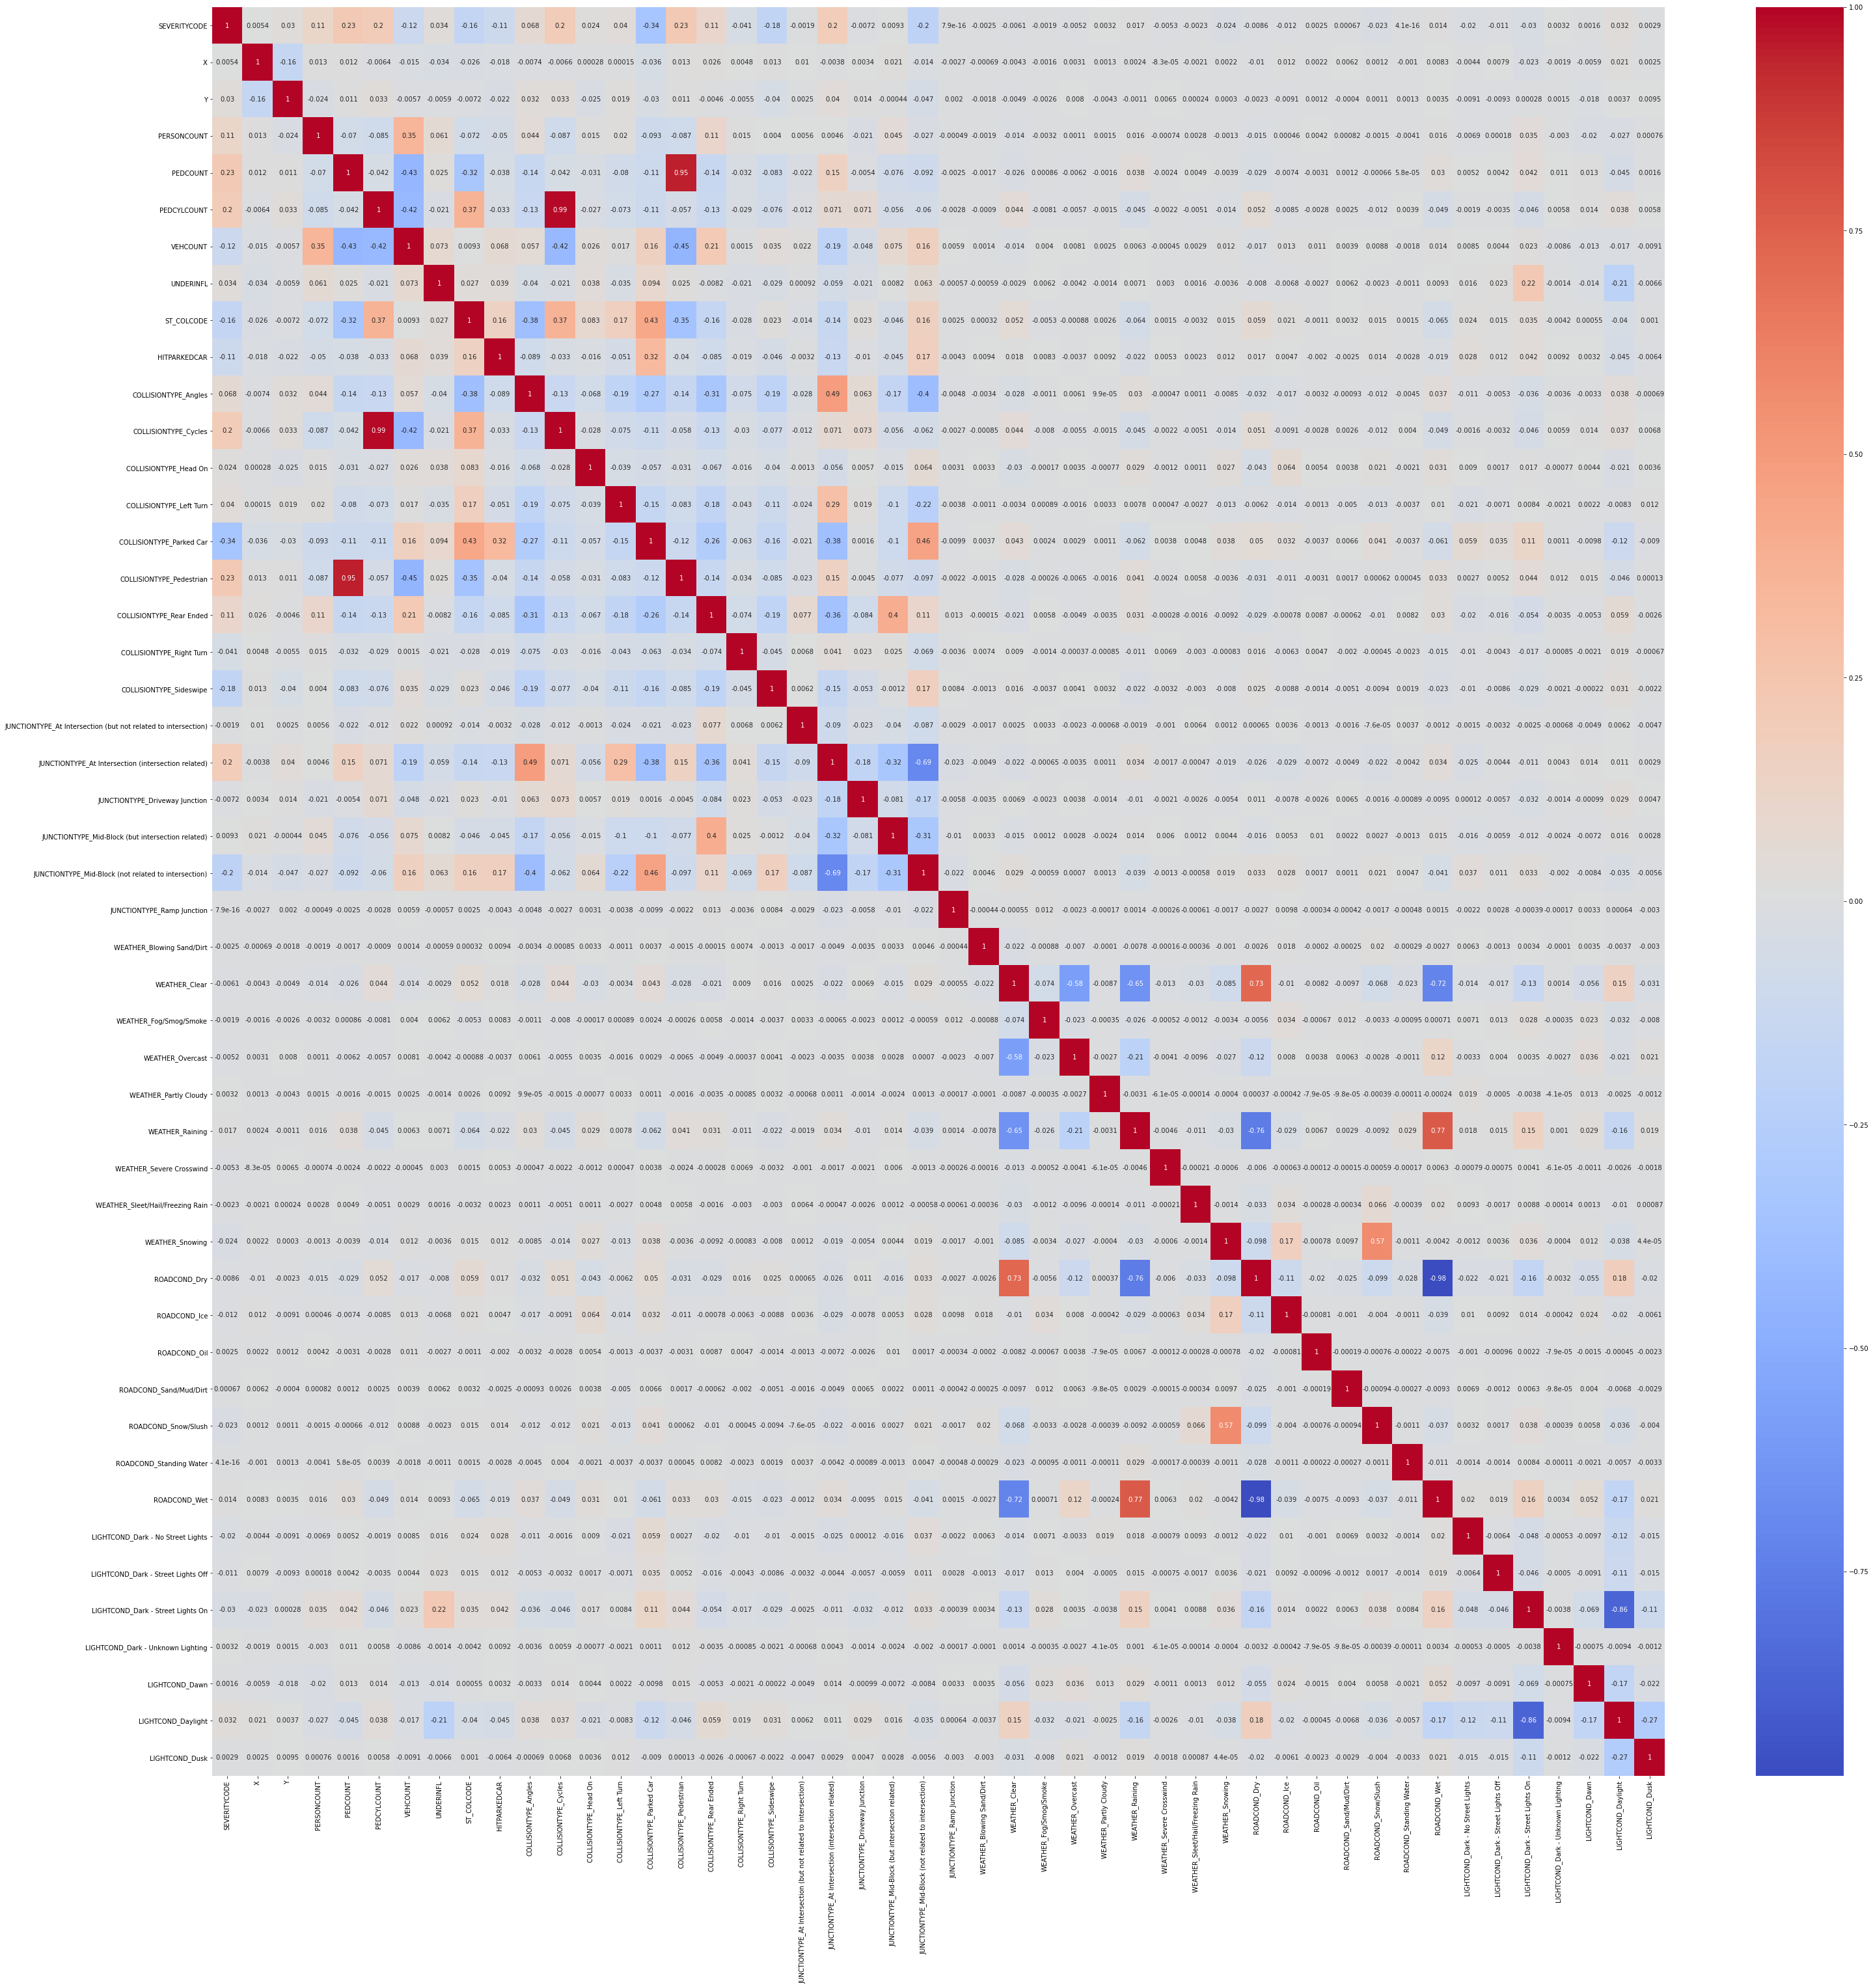

In [17]:
import matplotlib.pyplot as plt
import seaborn as sb

corr_data = final_data.corr()

plt.figure(figsize=(50, 50))
sb.heatmap(corr_data,annot=True,cmap='coolwarm')
plt.show()

### Summary
We now have the final data! The next steps is to split the data into training and test data, and start creating and training our model. As mentioned earlier, the primary model that I'll use is **Logistic Regression**. I'll also use maybe two to three more models to differentiate and to see which one has the highest accuracy rate. 

Thanks for reading my notebook. Good luck!

Best,

[Josh SV.](www.linkedin.com/in/josh-valdeleon-2a8984150)